
# Regresión Lineal Múltiple: Teoría, Supuestos y Cálculo

La **regresión lineal múltiple** es una extensión del modelo de regresión lineal simple, donde se predice una variable dependiente `Y` utilizando múltiples variables independientes `X1, X2, ..., Xn`.

## Ecuación del modelo:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon
$$

---

## Objetivos del notebook

- Explicar paso a paso el modelo con **cálculo matricial**.
- Verificar los **supuestos clásicos** de la regresión lineal.
- Implementar el modelo con **Scikit-learn**.



In [1]:
import numpy as np
import pandas as pd

In [2]:
# Simular datos
np.random.seed(0)
n = 100
X1 = np.random.normal(5, 2, n)
X2 = np.random.normal(3, 1, n)
epsilon = np.random.normal(0, 1, n)
Y = 4 + 2 * X1 - 1.5 * X2 + epsilon

# Construir DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})
df.head()


,X1,X2,Y
0,8.528105,4.883151,13.362302
1,5.800314,1.652241,12.882888
2,6.957476,1.729515,16.420339
3,9.481786,3.969397,17.664741
4,8.735116,1.826877,19.370049



## Representación Matricial

El modelo puede representarse como:


$$\mathbf{Y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$


Donde:

- \( \mathbf{Y} \) es un vector columna de respuestas (n x 1).
- \( \mathbf{X} \) es la matriz de diseño (n x (p+1)) con columna de 1s.
- \( \boldsymbol{\beta} \) es el vector de coeficientes.
- \( \boldsymbol{\epsilon} \) es el vector de errores.

La estimación de \( \boldsymbol{\beta} \) se realiza usando la fórmula de mínimos cuadrados:

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{Y}
$$


In [3]:

# Agregar columna de 1s para el intercepto
X = np.column_stack((np.ones(n), X1, X2))
Y_matrix = Y.reshape(-1, 1)

# Calcular beta usando mínimos cuadrados
XTX = X.T @ X
XTY = X.T @ Y_matrix
beta_hat = np.linalg.inv(XTX) @ XTY
beta_hat


array([[ 3.63324111],
       [ 2.03340818],
       [-1.45571415]])

In [4]:

# Predicciones y errores
Y_pred = X @ beta_hat
residuals = Y_matrix - Y_pred

# Calcular métricas
SSE = np.sum(residuals**2)
SST = np.sum((Y_matrix - np.mean(Y_matrix))**2)
R2 = 1 - (SSE / SST)
print(f"R²: {R2:.4f}")


R²: 0.9516



## Supuestos del Modelo de Regresión Lineal

1. **Linealidad**: Relación lineal entre Y y X.
2. **Independencia**: Errores no están correlacionados.
3. **Homoscedasticidad**: Varianza constante de errores.
4. **Normalidad de los errores**.


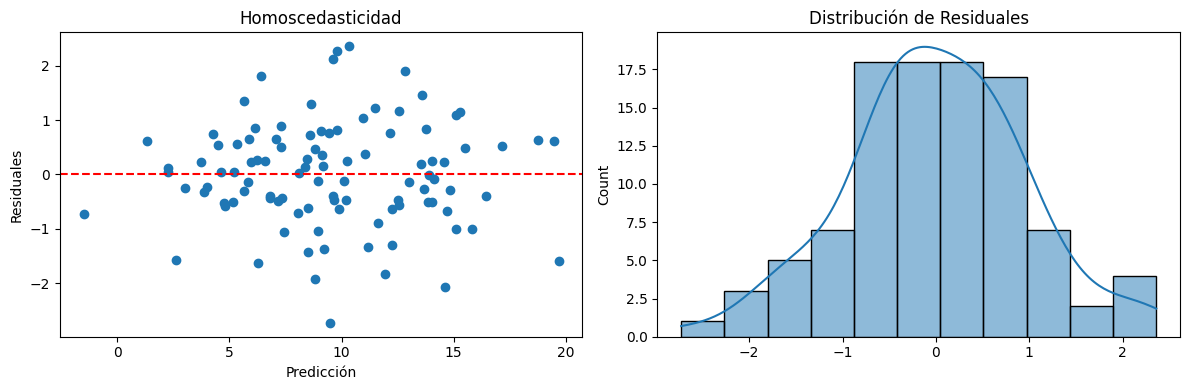

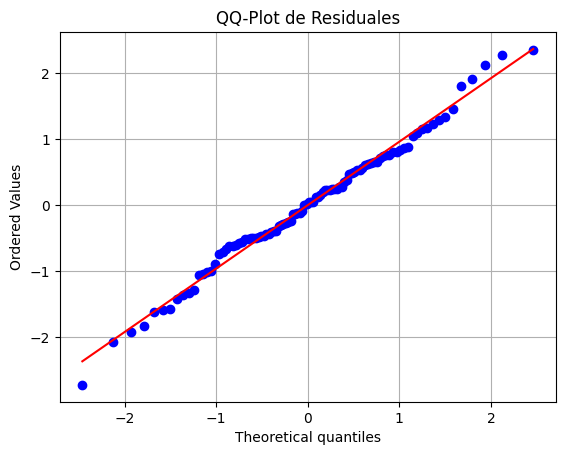

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Residuales
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(Y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicción")
plt.ylabel("Residuales")
plt.title("Homoscedasticidad")

plt.subplot(1,2,2)
sns.histplot(residuals.ravel(), kde=True)
plt.title("Distribución de Residuales")
plt.tight_layout()
plt.show()

# QQ Plot para normalidad
stats.probplot(residuals.ravel(), dist="norm", plot=plt)
plt.title("QQ-Plot de Residuales")
plt.grid(True)
plt.show()



## Implementación con Scikit-learn

Una vez entendido el modelo y sus supuestos, podemos usar `LinearRegression` de scikit-learn para ajustar el modelo de forma práctica.


In [6]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(df[['X1', 'X2']], df['Y'])
y_pred = model.predict(df[['X1', 'X2']])
print("Intercepto:", model.intercept_)
print("Coeficientes:", model.coef_)
print("R²:", r2_score(df['Y'], y_pred))


Intercepto: 3.6332411132735603
Coeficientes: [ 2.03340818 -1.45571415]
R²: 0.9516382641379105



## Ejercicio Final

- Usa un dataset real (como `sklearn.datasets.load_diabetes`) para ajustar una regresión lineal múltiple.
- Verifica los supuestos con gráficos.
- Compara los coeficientes obtenidos con los esperados.

